In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import sys
sys.path.append('../')
import utils
import settings

In [13]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files(diff_path='../')

In [14]:
X_reshaped_train_estimated_a, X_reshaped_train_estimated_b, X_reshaped_train_estimated_c, X_reshaped_train_observed_a, X_reshaped_train_observed_b, X_reshaped_train_observed_c, X_reshaped_test_estimated_a, X_reshaped_test_estimated_b, X_reshaped_test_estimated_c = utils.get_reshaped_files(diff_path='../')

In [15]:
X_a_reshaped = pd.concat([X_reshaped_train_observed_a, X_reshaped_test_estimated_a])
X_a_reshaped

,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.000000,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.000000,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.000000,0.000000,1734.000000,

In [16]:
days = utils.get_for_days_to_predict()
len(days)

30

In [232]:
30 + 31 + 3 

64

In [17]:
keys = [1, 2, 3]
X_reshaped_frame_a = [ X_reshaped_train_estimated_a, X_reshaped_train_observed_a, X_reshaped_test_estimated_a ]
X_frame_a = pd.concat(X_reshaped_frame_a, keys=keys)
X_frame_a.reset_index(level=0, inplace=True, names='frame_type')

train_a = train_a.rename(columns={'time': 'date_forecast_0'})

X_frame_a['date_forecast_0'] = pd.to_datetime(X_frame_a['date_forecast_0'])
train_a['date_forecast_0'] = pd.to_datetime(train_a['date_forecast_0'])

X_y_a = X_frame_a.merge(train_a, on='date_forecast_0', how='inner')
X_y_a.reset_index(drop=True, inplace=True)

In [18]:
X_y_a2 = X_frame_a.merge(train_a, on='date_forecast_0', how="outer", indicator=True)
X_y_a2.reset_index(drop=True, inplace=True)

In [233]:
X_train_observed_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


In [19]:
X_frame_a.describe()

,frame_type,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3
count,34782.000000,34782,34782.000000,34782.000000,26775.000000,3.478200e+04,34782.000000,31630.000000,34782.000000,34782.000000,34782.000000,3.478200e+04,34782.000000,3.478200e+04,34782.000000,34782.0,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,3478

In [20]:
X_y_a

,frame_type,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3,pv_measurement
0,1,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.50000

In [21]:
# fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
# feature_name = 'pv_measurement'
# train_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='Train A', color='red')
# train_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='Train B', color='blue')
# train_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='Train C', color='green')


In [22]:
date1 = np.datetime64('2020-04-29 08:00:00')
date2 = np.datetime64('2020-05-03 22:00:00')

In [23]:
important_keys = utils.get_most_important_keys()

[]

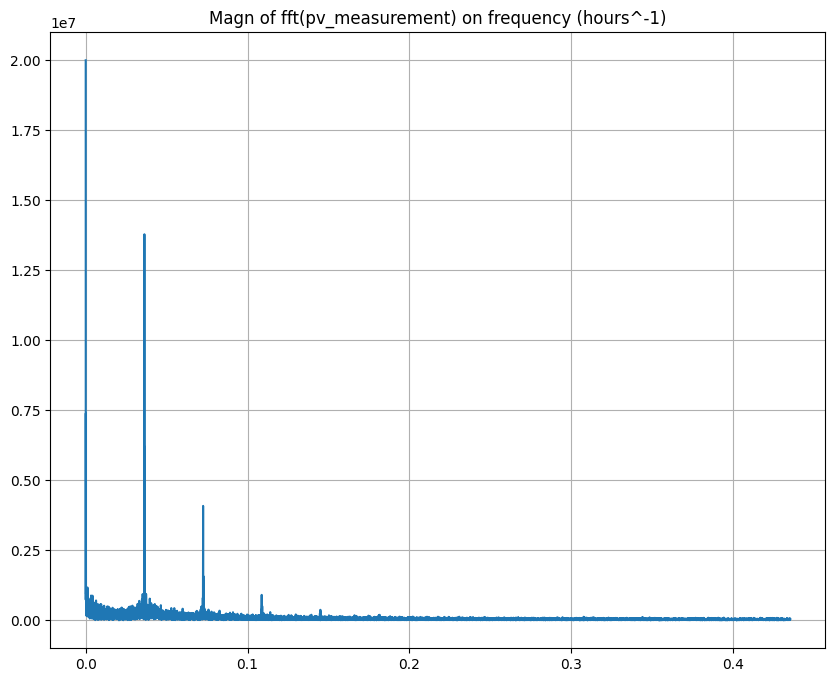

In [59]:
y = np.array(train_a["pv_measurement"])
fft_y = np.fft.fft(y[:29668])
freq_y = np.fft.fftfreq(len(y)) # Spacing in hour
plt.figure(figsize=(10,8))
plt.plot(freq_y[:len(fft_y)//2], np.abs(fft_y)[:len(fft_y)//2])
plt.title("Magn of fft(pv_measurement) on frequency (hours^-1)")
plt.grid()
plt.plot()


In [60]:
1 / freq_y[np.argmax(np.abs(fft_y[1:len(fft_y)//2]))]

27.59919028340081

A priori la différence d'échelle est trop grande entre les fréquences pour pouvoir avoir les frequences à l'échelle des mois/années

Pour cela on doit échantilloner y en prenant une mesure par jour ou 2 jours ou semaine etc

[]

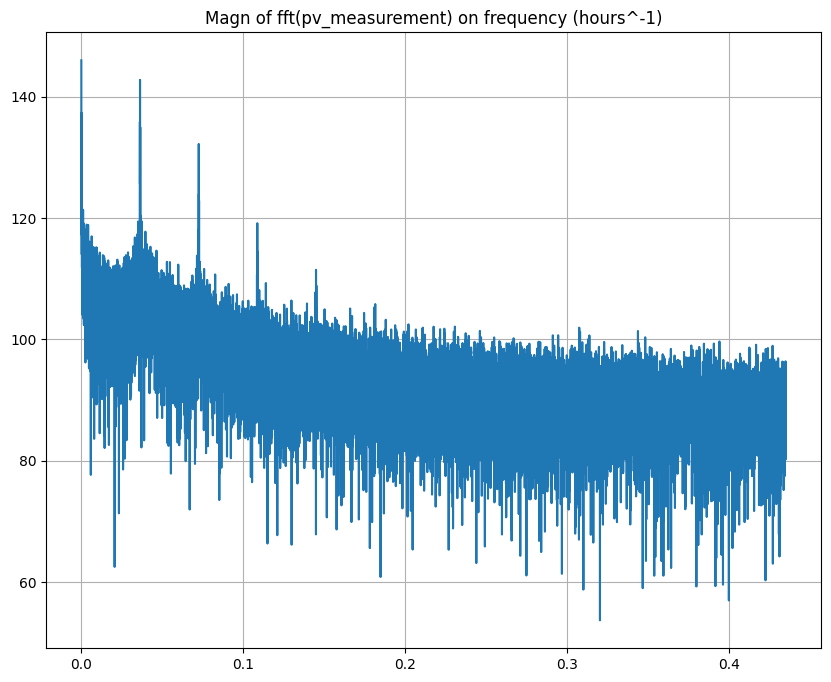

In [61]:
plt.figure(figsize=(10,8))
plt.plot(freq_y[:len(fft_y)//2], 20 * np.log10(np.abs(fft_y))[:len(fft_y)//2])
plt.title("Magn of fft(pv_measurement) on frequency (hours^-1)")
plt.grid()
plt.plot()

[]

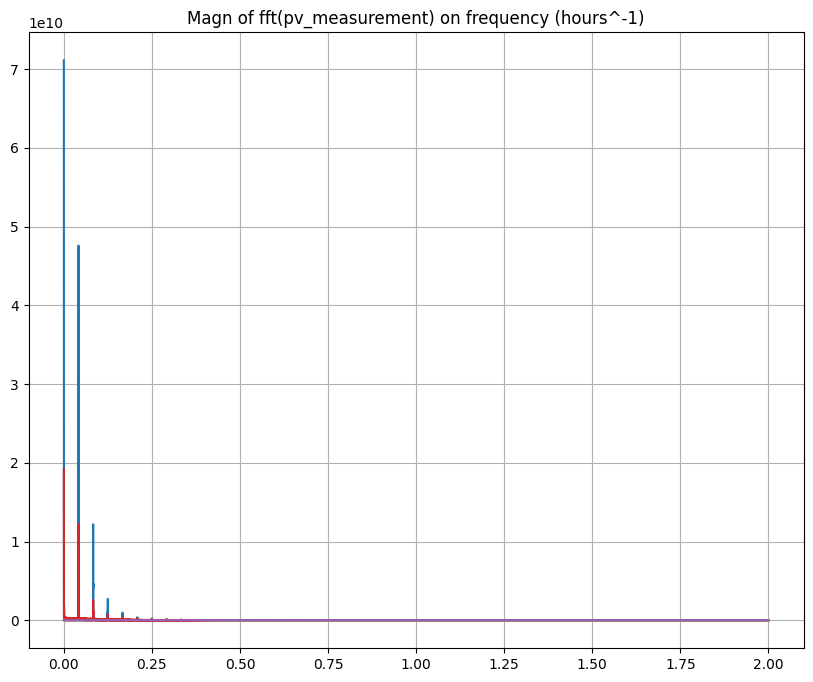

In [62]:
keys2 = important_keys

X = np.array(X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']])
# fft_x = np.fft.fft(X, axis=(0,))
fft_x = np.zeros(X.shape, dtype=complex)
for dim in range(X.shape[1]):
    fft_x[:, dim] = np.fft.fft(X[:, dim])
freq_x = np.fft.fftfreq(118669, .25) # Spacing in quarter hour
plt.figure(figsize=(10,8))
for s in range(fft_x.shape[1]):
    plt.plot(freq_x[:len(freq_x)//2], np.abs(fft_x.T[s])[:len(freq_x)//2])
plt.title("Magn of fft(pv_measurement) on frequency (hours^-1)")
plt.grid()
plt.plot()

In [63]:
important_keys

['date_forecast',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W']

[]

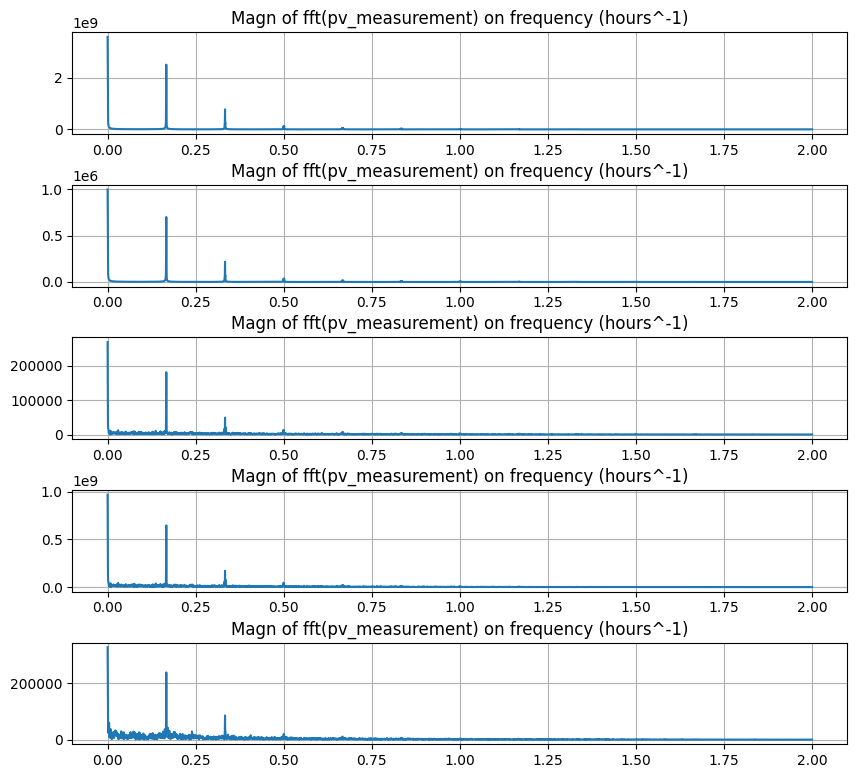

In [81]:
keys2 = important_keys

x = np.array(X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']])
x = np.array([ x[k,:] for k in range(0, len(X), 4)])
fft_x = np.zeros(x.shape, dtype=complex)
for dim in range(x.shape[1]):
    fft_x[:, dim] = np.fft.fft(x[:, dim])
freq_x = np.fft.fftfreq(len(x), .25)

plt.figure(figsize=(10,8))
for s in range(fft_x.shape[1]):
    plt.subplot(5, 1, s + 1)
    plt.plot(freq_x[:len(freq_x)//2], np.abs(fft_x.T[s])[:len(freq_x)//2])
    plt.title("Magn of fft(pv_measurement) on frequency (hours^-1)")
    plt.grid()

plt.subplots_adjust(top=1., hspace=0.5)
plt.plot()

In [65]:
X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']]

,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
118664,0.0,0.0,0.0,0.0,0.0
118665,0.0,0.0,0.0,0.0,0.0
118666,0.0,0.0,0.0,0.0,0.0
118667,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Train C'}, xlabel='date_forecast'>

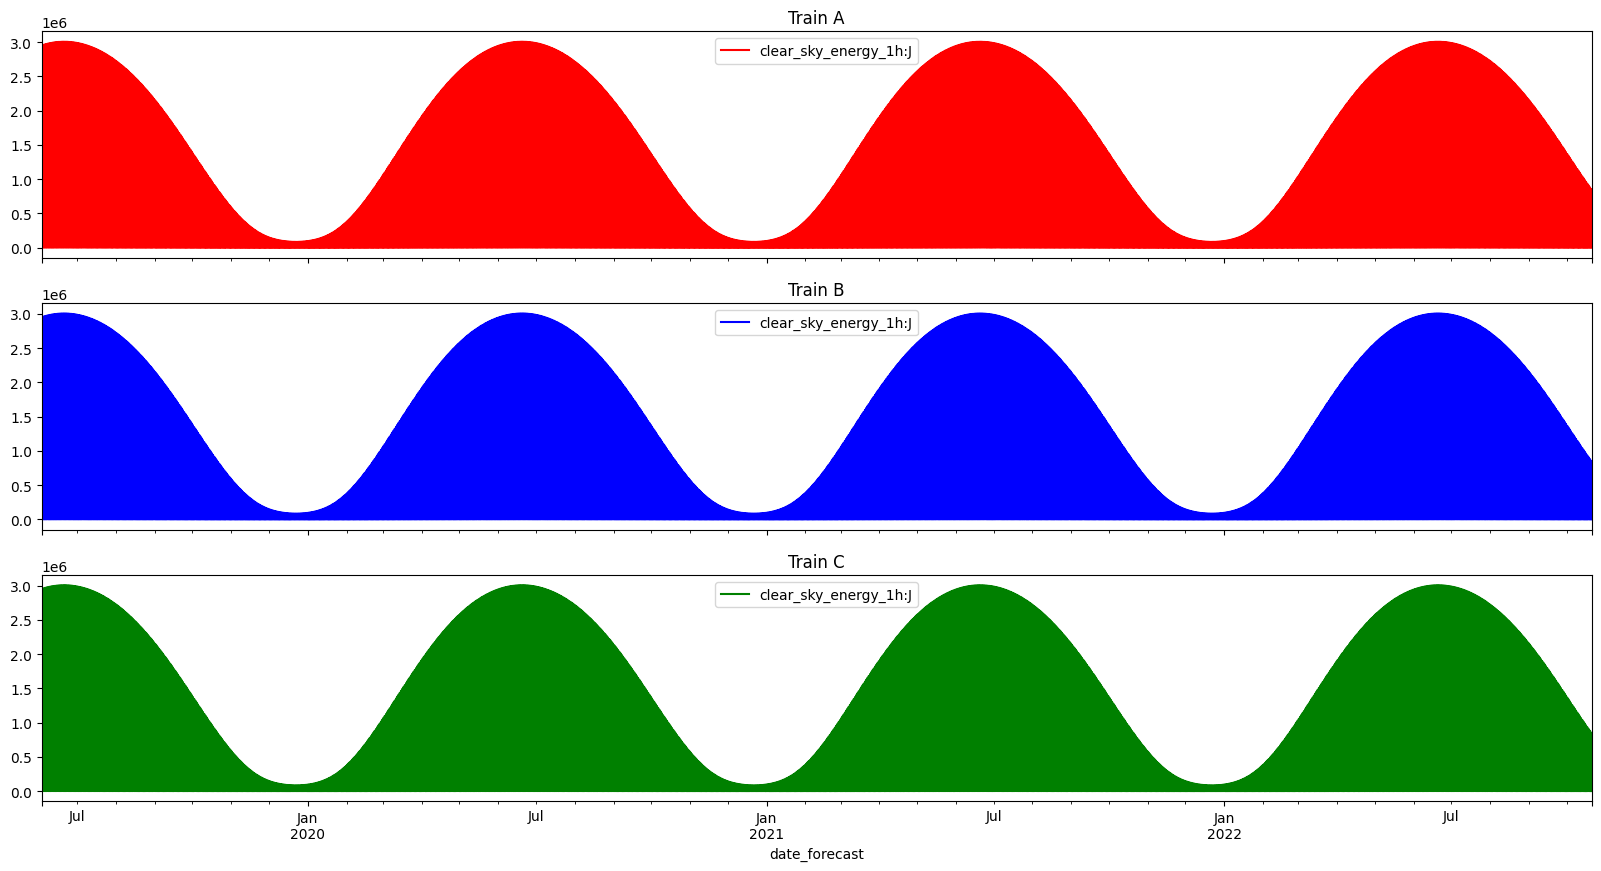

In [75]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'clear_sky_energy_1h:J' # 'pv_measurement'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train A', color='red')
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train B', color='blue')
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train C', color='green')

In [76]:
H = np.array([ fft_y / fft_x[:, k] for k in range(fft_x.shape[1]) ]).T
H.shape

(29668, 5)

[]

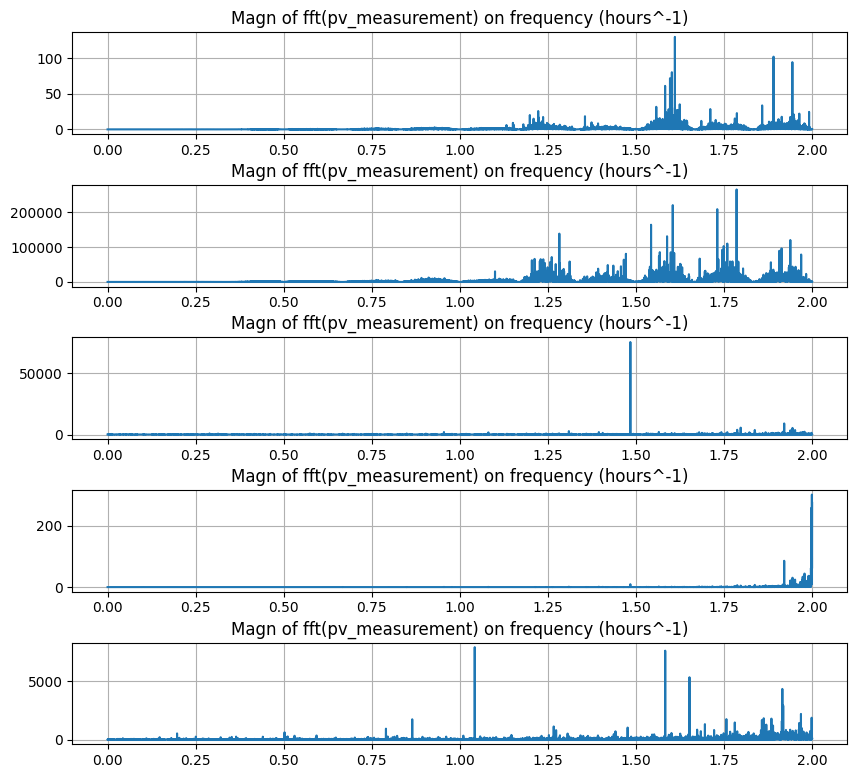

In [77]:
keys2 = important_keys
plt.figure(figsize=(10,8))
for s in range(H.shape[1]):
    plt.subplot(5, 1, s + 1)
    plt.plot(freq_x[:len(freq_x)//2], np.abs(H.T[s])[:len(freq_x)//2])
    plt.title("Magn of fft(pv_measurement) on frequency (hours^-1)")
    plt.grid()

plt.subplots_adjust(top=1., hspace=0.5)
plt.plot()

In [78]:
h = np.fft.ifft(H)

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


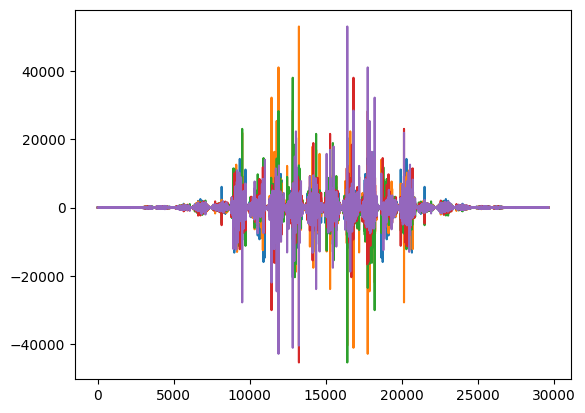

In [79]:
plt.plot(h)

In [80]:
h.shape

(29668, 5)

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


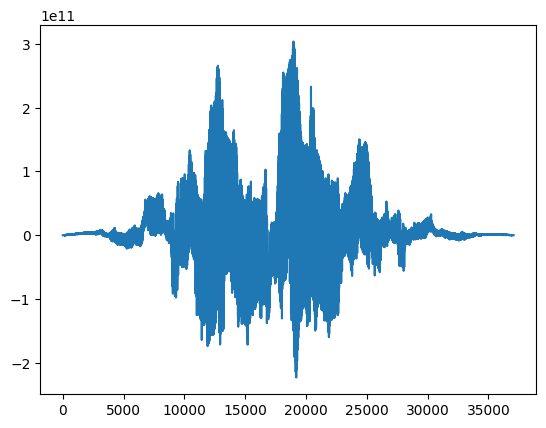

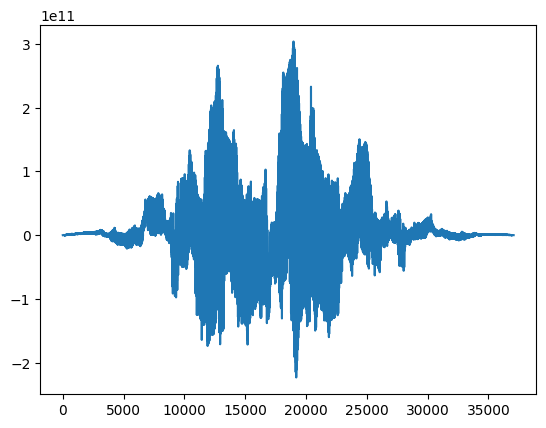

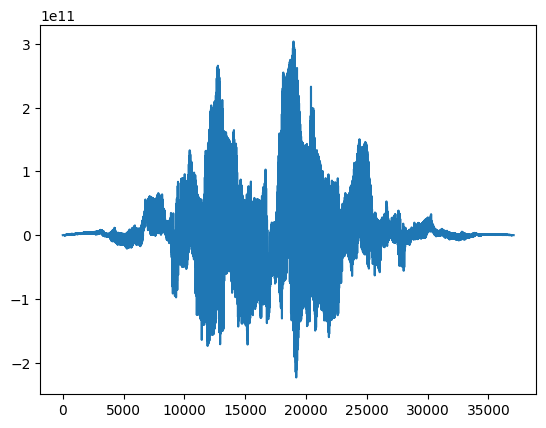

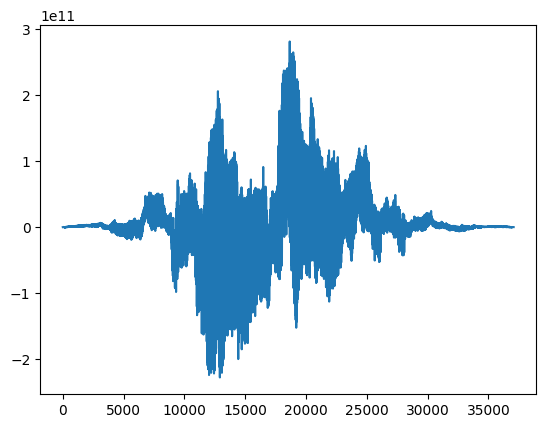

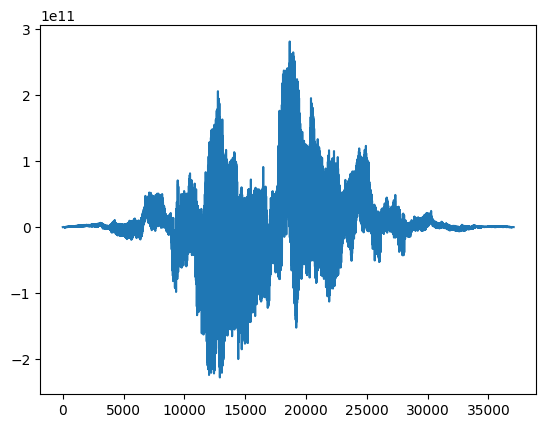

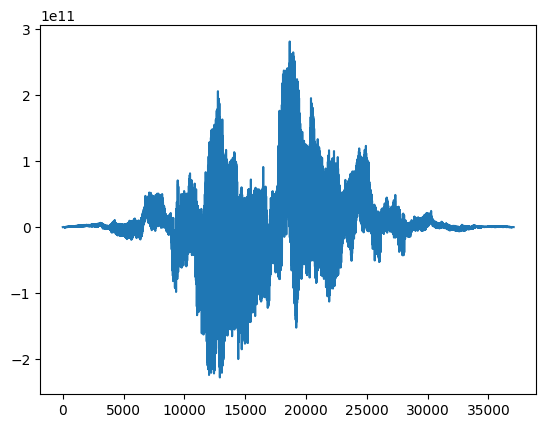

In [89]:
y_pred = np.convolve(h[:,0], x[:,0], mode='full')
plt.plot(y_pred)
plt.show()
for k in range(1, x.shape[1]):
    y_pred += np.convolve(h[:,k], x[:,k], mode='full')
    plt.plot(y_pred)
    plt.show()
plt.show()
plt.plot(y_pred)

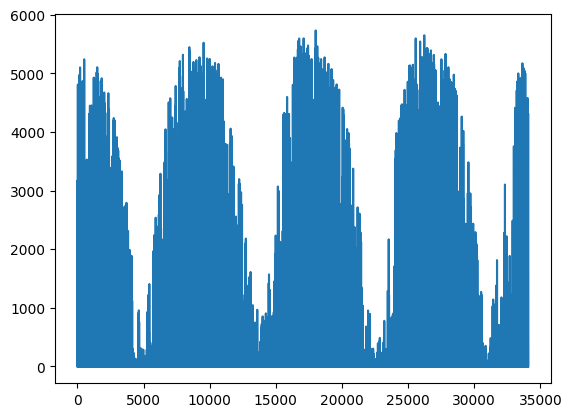

In [90]:
plt.plot(train_a['pv_measurement'])

In [ ]:
# fft_test_estimated_a = np.fft.fft(X_test_estimated_a[])

In [104]:
x = np.array(X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']])
x = np.array([ x[k,:] for k in range(0, len(x), 4)])

y = np.array(train_a["pv_measurement"])
x.shape, y.shape

((29668, 5), (34085,))

In [115]:
def minmax_norm(df):
    return ( df - np.min(df) ) / ( np.max(df) - np.min(df))

In [136]:
from sklearn.preprocessing import normalize

(29668, 1)
(29668, 1)
(29668, 1)
(29668, 1)
(29668, 1)


[]

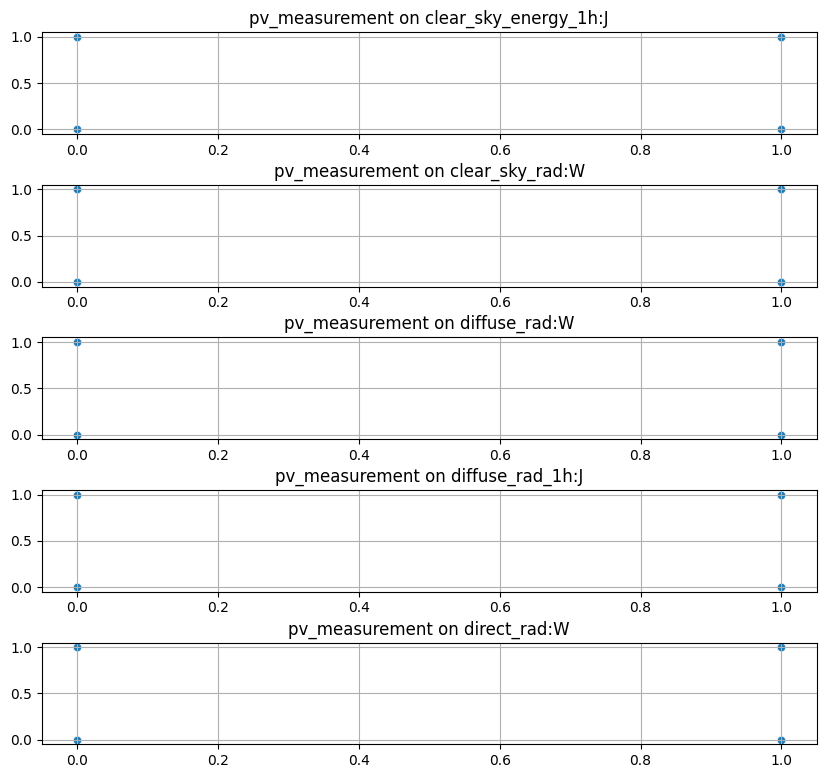

In [231]:
keys2 = important_keys

x = np.array(X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']])
x = np.array([ x[k, :] for k in range(0, len(x), 4)])
# print(x.shape)
for k in range(x.shape[1]):
    print(x[:, k].reshape(-1, 1).shape)
x = np.array( [ normalize(x[:, k].reshape(-1, 1), norm='l2') for k in range(x.shape[1])]).T.reshape(-1, x.shape[1])
# print(x.shape)
y = np.array(train_a["pv_measurement"])[:len(x)]
y = np.array([ normalize(y.reshape(-1, 1), norm='l2') for _ in range(x.shape[1])]).T.reshape(-1, x.shape[1])

# x[:, 0] = np.log(x[:, 0])
# y[:, 0] = 1 - np.exp(- y[:, 0])
x2 = x[:, 0] + np.exp(x[:, 0])

plt.figure(figsize=(10,8))
for s in range(x.shape[1]):
    plt.subplot(5, 1, s + 1)
    sns.scatterplot(x=x[:, s], y=y[:, s]) # , hue='y', data=data_1)
    # plt.plot(x.T[s], y[:, s])
    plt.title(f"pv_measurement on {important_keys[s+1]}")
    plt.grid()

plt.subplots_adjust(top=1., hspace=0.5)
plt.plot()

In [92]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)
# Créez un modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Faites des prédictions sur les données de test
y_pred = model.predict(x_test)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Maintenant, vous pouvez utiliser le modèle pour prédire y à partir de nouvelles données x
new_x = np.array([6, 7, 8])
predicted_y = model.predict(new_x.reshape(-1, 1))
print("Predicted y:", predicted_y)

Mean Squared Error: 1.3061224489795866
Predicted y: [24.         26.71428571 29.42857143]


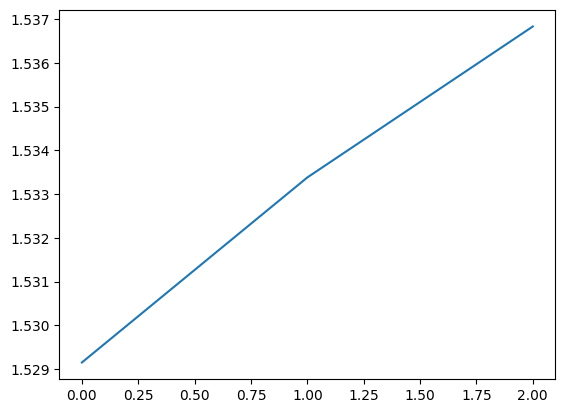

In [96]:
# plt.plot(np.arctan(predicted_y))

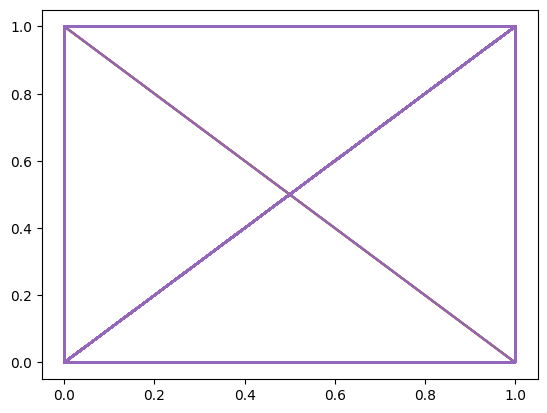

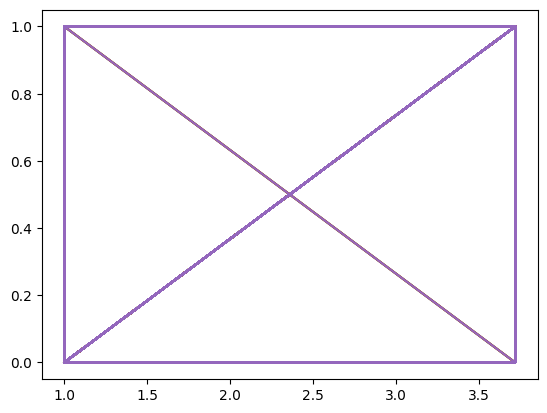

In [157]:
plt.plot(x[:, 0], y)
plt.show()
plt.plot(x2, y)

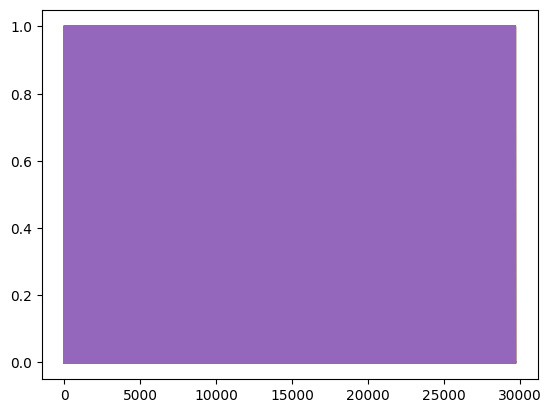

In [164]:
plt.plot(y)

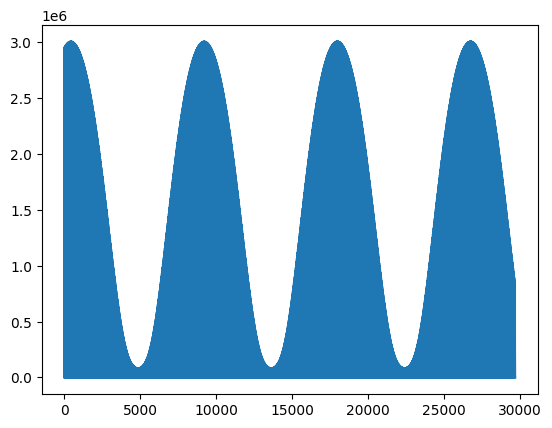

In [171]:
np.cov(X_train_observed_a['clear_sky_energy_1h:J'][:30000])
x = np.array(X_train_observed_a[['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'diffuse_rad:W', 'diffuse_rad_1h:J','direct_rad:W']])
x = np.array([ x[k,:] for k in range(0, len(x), 4) ])
plt.plot(x[:,0])

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_41726/542110399.py:6: RuntimeWarning: invalid value encountered in arcsin
  plt.plot(np.sin(2 * np.pi * freq * (a + (np.arcsin(x[15, 0]) * 2 - 1))) )


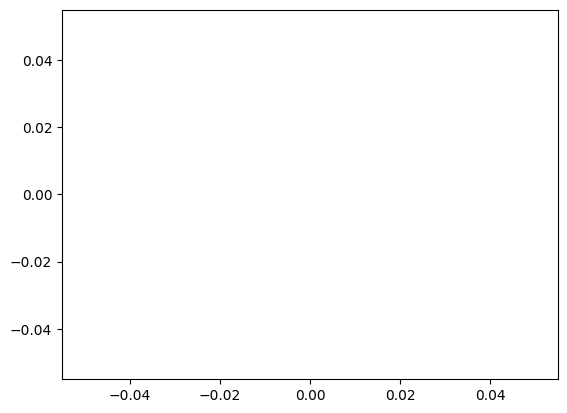

In [230]:
to_plot = (x[:, 0] / np.max(x[:, 0])) * 2 - 1
# toplot2 = ((x[:, 0] / np.max(x[:, 0]))) 
# plt.plot(to_plot - toplot2)
a = np.linspace(0, len(to_plot), len(to_plot))
freq = 1 / ((np.argmax(x[:, 0]) - np.argmax(x[:5000, 0])) / 2)
plt.plot(np.sin(2 * np.pi * freq * (a + (np.arcsin(x[15, 0]) * 2 - 1))) )
# plt.plot(to_plot)


In [229]:
a + np.arcsin(x[15, 0])

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_41726/281259623.py:1: RuntimeWarning: invalid value encountered in arcsin
  a + np.arcsin(x[15, 0])


array([nan, nan, nan, ..., nan, nan, nan])

In [226]:
x[15, 0] / np.max(x[:, 0])

0.9505334